In [1]:
#import sys
#!{sys.executable} -m pip install --user pandas

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.pyplot import gca

In [2]:
freq = {}

In [3]:
def read_file(name = 'words.txt'):
    cou = 0
    with open(name, encoding="utf-8", errors='ignore') as f:
        for word in f:
            #print(word)
            for char in word:
                if char in freq:
                    freq[char]=freq[char]+1
                else:
                    freq[char]=int(1)

In [4]:
read_file()

In [5]:
def prune():
    try:
        del freq['\n']
        del freq['\ufeff']
        del freq['\u200c']
        del freq['\u200d']
        english = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
        for char in english_alpha:
            try:
                del freq[char]
            except:
                pass
        bengali_num = '১২৩৪৫৬৭৮৯০'
        for char in bengali_num:
            try:
                del freq[char]
            except:
                pass
        symbols = '`~@#$%^&*,./?;:\'\"(){}[]'
        for char in symbols:
            try:
                del freq[char]
            except:
                pass
    except:
        pass
    #print(freq)

In [6]:
prune()

No handles with labels found to put in legend.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  import sys


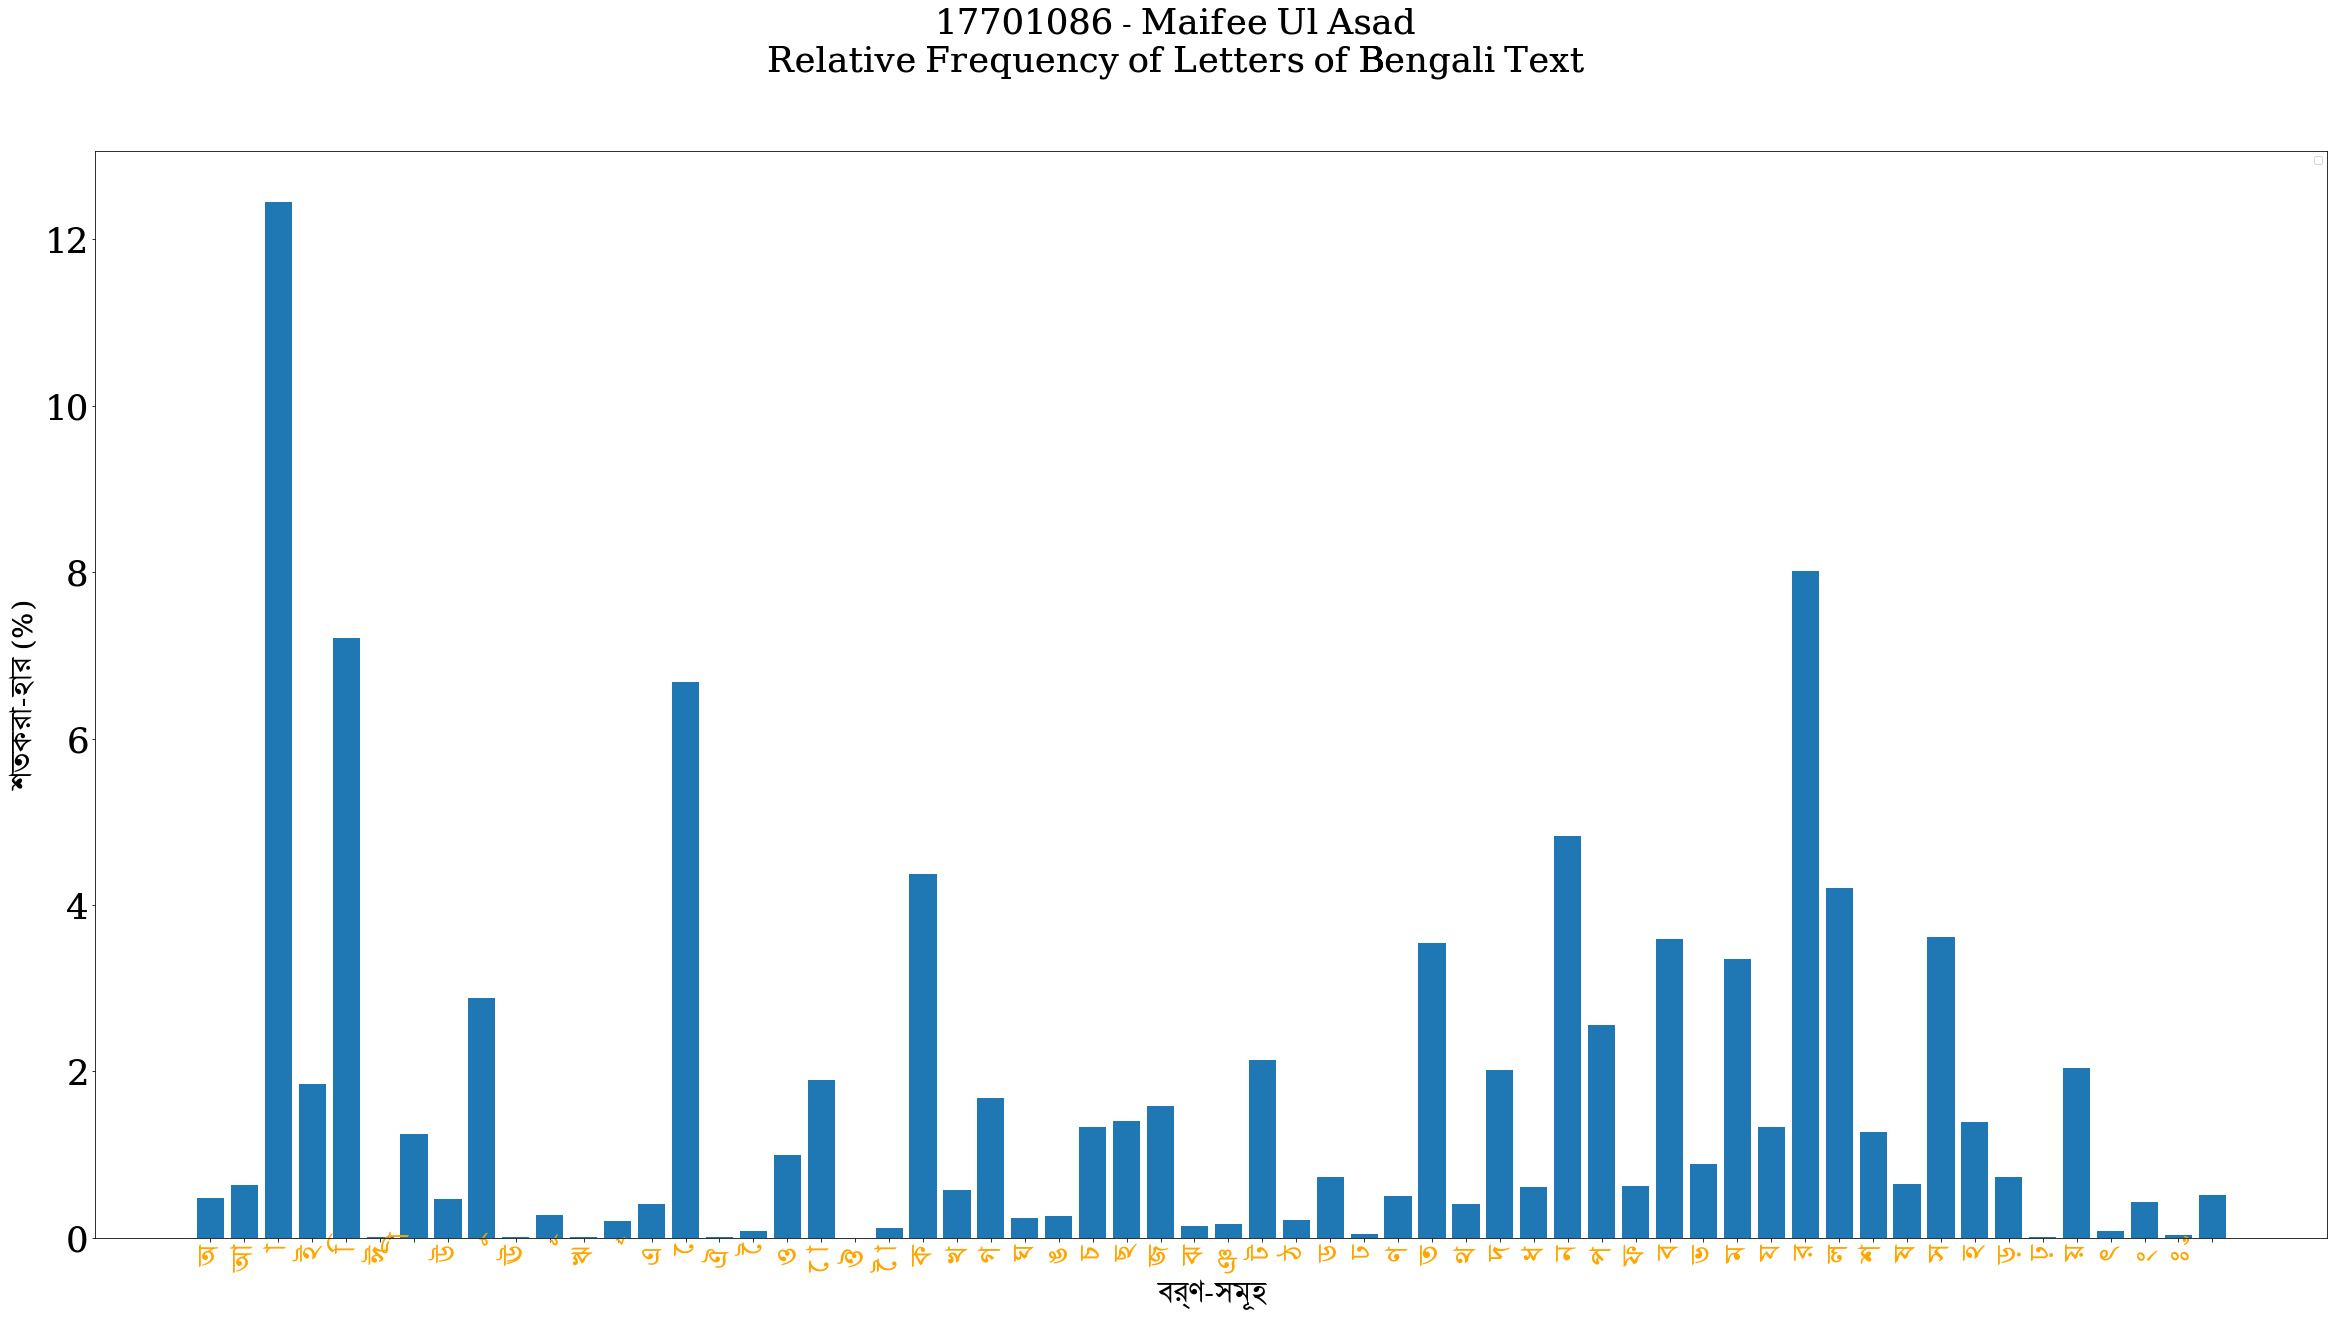

In [8]:
fig, ax = plt.subplots(figsize=(40,20))
prop = fm.FontProperties(fname='Nikosh.ttf')
ax.legend(prop=prop)

font_dirs = ['./', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'Nikosh'
#plt.rcParams["font.size"] = "50"
plt.tick_params(labelsize=36)

keys = freq.keys()
values = freq.values()

alpha_seq = 'অআ াই িঈ ীউ ুঊ ূঋ ৃএ েঐ ৈও োঔ ৌকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহড়ঢ়য়ৎংঃঁ'
alpha_seq ="".join(alpha_seq.split()) 

#print(list(alpha_seq))

sorted_values = []
total = 0

for alpha in alpha_seq:
    count = freq[alpha] if alpha in freq else 0
    sorted_values.append(count)
    total += count
    
sorted_values = [100*(value/total) for value in sorted_values]

plt.bar(range(len(alpha_seq)), sorted_values, align='center')
plt.xticks(np.arange(len(alpha_seq)), list(alpha_seq), color='orange', rotation=90)

fig.suptitle('17701086 - Maifee Ul Asad\nRelative Frequency of Letters of Bengali Text', fontsize=36)

plt.xlabel('বর্ণ-সমূহ', fontsize=36)
plt.ylabel('শতকরা-হার (%)', fontsize=36)

plt.show()